In [125]:
import keras.layers
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [261]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("..\\Starter_Code\\Resources\\charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


# ATTEMPT 1

In [229]:
ASK_AMT = application_df['ASK_AMT']
y = application_df['IS_SUCCESSFUL']
application_df = application_df.drop(['EIN', 'NAME', 'ASK_AMT', 'IS_SUCCESSFUL'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,1,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N


In [230]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
category_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = category_counts[category_counts < threshold].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [231]:
# You may find it helpful to look at CLASSIFICATION value counts > 1

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace

threshold = 1
category_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = category_counts[category_counts > threshold].index

# Replace in dataframe
for app in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(app,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

Other    34273
C1580        1
C1900        1
C1820        1
C6100        1
C1248        1
C2600        1
C1370        1
C5200        1
C4200        1
C2190        1
C1236        1
C2570        1
C3700        1
C2561        1
C2500        1
C1570        1
C1283        1
C2380        1
C1732        1
C1728        1
C2170        1
C4120        1
C8210        1
C4500        1
C1245        1
C2150        1
Name: CLASSIFICATION, dtype: int64

In [232]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
dummies =pd.get_dummies(application_df)
dummies.head()

,STATUS,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [233]:
newDF = pd.concat([dummies,ASK_AMT], axis=1)

In [234]:
newDF.head()

,STATUS,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5000
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,108590
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,5000
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6692
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,142590


In [235]:
# Split our preprocessed data into our features and target arrays
x = newDF

# Split the preprocessed data into a training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.2)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [236]:
X_train.shape

(27439, 64)

In [238]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential([
    keras.layers.Dense(input_shape=(64,) ,units=512,activation='relu'),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid'),
])

# Check the structure of the model
nn.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 512)               33280     
                                                                 
 dense_108 (Dense)           (None, 256)               131328    
                                                                 
 dense_109 (Dense)           (None, 128)               32896     
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dense_111 (Dense)           (None, 1)                 65        
                                                                 
Total params: 205,825
Trainable params: 205,825
Non-trainable params: 0
_________________________________________________________________


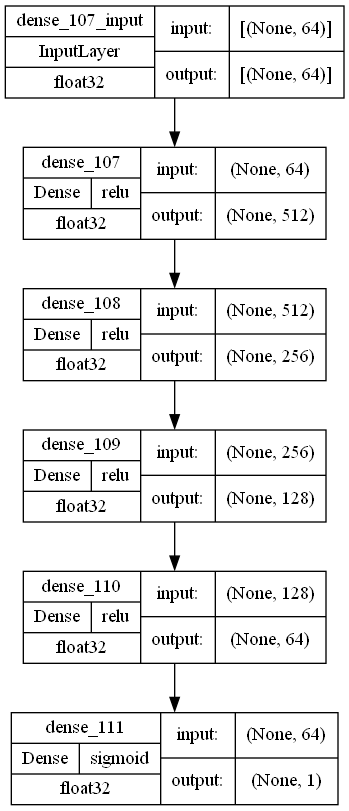

In [239]:
keras.utils.plot_model(nn,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_names=True,
                       show_layer_activations=True)

In [240]:
class SaveWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            self.model.save_weights('model_weights.h5')
            print(f'  Saved model weights at epoch {epoch}.')


# Compile the model
nn.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)
# Train the model
history = nn.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test), batch_size=128,
                 callbacks=[SaveWeightsCallback()])

Epoch 1/100
215/215 [==============================] - 4s 11ms/step - loss: 0.5782 - accuracy: 0.7206 - val_loss: 0.5767 - val_accuracy: 0.7219
Epoch 2/100
215/215 [==============================] - 2s 8ms/step - loss: 0.5694 - accuracy: 0.7247 - val_loss: 0.5796 - val_accuracy: 0.7179
Epoch 3/100
215/215 [==============================] - 2s 8ms/step - loss: 0.5689 - accuracy: 0.7265 - val_loss: 0.5843 - val_accuracy: 0.7224
Epoch 4/100
215/215 [==============================] - 2s 9ms/step - loss: 0.5666 - accuracy: 0.7275 - val_loss: 0.5742 - val_accuracy: 0.7229
Epoch 5/100
215/215 [==============================] - 2s 9ms/step - loss: 0.5661 - accuracy: 0.7267 - val_loss: 0.5749 - val_accuracy: 0.7230
Epoch 6/100
215/215 [==============================] - 2s 10ms/step - loss: 0.5653 - accuracy: 0.7280 - val_loss: 0.5738 - val_accuracy: 0.7235
Epoch 7/100
215/215 [==============================] - 2s 8ms/step - loss: 0.5648 - accuracy: 0.7289 - val_loss: 0.5758 - val_accuracy: 0.72

In [241]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.6162 - accuracy: 0.7217 - 803ms/epoch - 4ms/step
Loss: 0.6162271499633789, Accuracy: 0.7217200994491577


# ATTEMPT 2

In [246]:
ASK_AMT = application_df['ASK_AMT']
y = application_df['IS_SUCCESSFUL']
application_df = application_df.drop(['EIN', 'NAME', 'ASK_AMT', 'IS_SUCCESSFUL','CLASSIFICATION'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,ProductDev,Association,1,0,N
1,T3,Independent,Preservation,Co-operative,1,1-9999,N
2,T5,CompanySponsored,ProductDev,Association,1,0,N
3,T3,CompanySponsored,Preservation,Trust,1,10000-24999,N
4,T3,Independent,Heathcare,Trust,1,100000-499999,N


In [247]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
category_counts = application_df['APPLICATION_TYPE'].value_counts()
application_types_to_replace = category_counts[category_counts < threshold].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [248]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies =pd.get_dummies(application_df)
dummies.head()

,STATUS,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [251]:
newDF = pd.concat([dummies,ASK_AMT], axis=1)

In [252]:
# Split our preprocessed data into our features and target arrays
x = newDF

# Split the preprocessed data into a training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.2)
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [253]:
X_train.shape

(27439, 37)

In [257]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential([
    keras.layers.Dense(input_shape=(37,) ,units=256,activation='relu'),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=64,activation='relu'),
    keras.layers.Dense(units=32,activation='relu'),
    keras.layers.Dense(units=16,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid'),
])

# Check the structure of the model
nn.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 256)               9728      
                                                                 
 dense_118 (Dense)           (None, 128)               32896     
                                                                 
 dense_119 (Dense)           (None, 64)                8256      
                                                                 
 dense_120 (Dense)           (None, 32)                2080      
                                                                 
 dense_121 (Dense)           (None, 16)                528       
                                                                 
 dense_122 (Dense)           (None, 1)                 17        
                                                                 
Total params: 53,505
Trainable params: 53,505
Non-tra

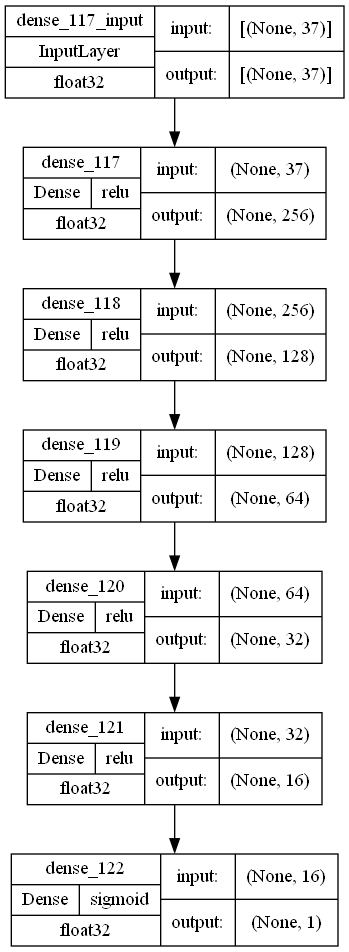

In [258]:
keras.utils.plot_model(nn,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_names=True,
                       show_layer_activations=True)

In [259]:
class SaveWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            self.model.save_weights('model_weights.h5')
            print(f'  Saved model weights at epoch {epoch}.')


# Compile the model
nn.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)
# Train the model
history = nn.fit(X_train_scaled, Y_train, epochs=100, validation_data=(X_test_scaled, Y_test), batch_size=128,
                 callbacks=[SaveWeightsCallback()])

Epoch 1/100
215/215 [==============================] - 4s 10ms/step - loss: 0.5807 - accuracy: 0.7194 - val_loss: 0.5753 - val_accuracy: 0.7216
Epoch 2/100
215/215 [==============================] - 1s 5ms/step - loss: 0.5696 - accuracy: 0.7259 - val_loss: 0.5756 - val_accuracy: 0.7238
Epoch 3/100
215/215 [==============================] - 1s 5ms/step - loss: 0.5665 - accuracy: 0.7271 - val_loss: 0.5769 - val_accuracy: 0.7194
Epoch 4/100
215/215 [==============================] - 1s 5ms/step - loss: 0.5664 - accuracy: 0.7266 - val_loss: 0.5727 - val_accuracy: 0.7245
Epoch 5/100
215/215 [==============================] - 1s 5ms/step - loss: 0.5652 - accuracy: 0.7271 - val_loss: 0.5733 - val_accuracy: 0.7235
Epoch 6/100
215/215 [==============================] - 1s 6ms/step - loss: 0.5651 - accuracy: 0.7283 - val_loss: 0.5742 - val_accuracy: 0.7243
Epoch 7/100
215/215 [==============================] - 1s 5ms/step - loss: 0.5643 - accuracy: 0.7292 - val_loss: 0.5756 - val_accuracy: 0.721

In [260]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5870 - accuracy: 0.7214 - 408ms/epoch - 2ms/step
Loss: 0.5870051383972168, Accuracy: 0.7214285731315613


# ATTEMPT 3

In [262]:
application_df.nunique()

EIN                       34299
NAME                      19568
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2
dtype: int64

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.

In [263]:
ASK_AMT = application_df['ASK_AMT']
ASK_AMT

0            5000
1          108590
2            5000
3            6692
4          142590
           ...   
34294        5000
34295        5000
34296        5000
34297        5000
34298    36500179
Name: ASK_AMT, Length: 34299, dtype: int64

In [264]:
y = application_df['IS_SUCCESSFUL']
y

0        1
1        1
2        0
3        1
4        1
        ..
34294    0
34295    0
34296    0
34297    1
34298    0
Name: IS_SUCCESSFUL, Length: 34299, dtype: int64

In [265]:
application_df=application_df.drop(['EIN','NAME','ASK_AMT' ,'IS_SUCCESSFUL'],axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,T10,Independent,C1000,ProductDev,Association,1,0,N
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N


In [266]:
encoder = LabelEncoder()

In [267]:
for i in application_df.columns:
    application_df[i] = encoder.fit_transform(application_df[i])

In [268]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS
0,0,2,1,4,0,1,0,0
1,10,2,36,3,1,1,1,0
2,12,0,51,4,0,1,0,0
3,10,0,36,3,3,1,2,0
4,10,2,1,1,3,1,3,0
...,...,...,...,...,...,...,...,...
34294,11,2,1,4,0,1,0,0
34295,11,0,51,4,0,1,0,0
34296,10,0,36,3,0,1,0,0
34297,12,2,51,4,0,1,0,0


In [269]:
newDF = pd.concat([application_df,ASK_AMT], axis=1)

In [270]:
# Split our preprocessed data into our features and target arrays
x= newDF


# Split the preprocessed data into a training and testing dataset
X_train, X_test, Y_train, Y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [271]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [272]:
X_train

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT
31183,10,2,2,3,3,1,0,0,5000
15770,10,2,1,3,3,1,0,0,5000
21523,10,0,1,3,3,1,0,0,5000
13573,10,2,1,3,3,1,0,0,5000
20380,11,0,51,4,0,1,0,0,5000
...,...,...,...,...,...,...,...,...,...
16850,10,2,1,3,3,1,6,0,333518
6265,10,2,51,3,3,1,0,0,5000
11284,10,2,2,3,3,1,0,0,5000
860,10,0,1,3,0,1,0,0,5000


In [273]:
X_train_scaled

array([[-0.06828975,  0.91525   , -0.66759382, ..., -0.57094959,
        -0.02832705, -0.03115182],
       [-0.06828975,  0.91525   , -0.71814661, ..., -0.57094959,
        -0.02832705, -0.03115182],
       [-0.06828975, -1.08471375, -0.71814661, ..., -0.57094959,
        -0.02832705, -0.03115182],
       ...,
       [-0.06828975,  0.91525   , -0.66759382, ..., -0.57094959,
        -0.02832705, -0.03115182],
       [-0.06828975, -1.08471375, -0.71814661, ..., -0.57094959,
        -0.02832705, -0.03115182],
       [-0.06828975,  0.91525   , -0.71814661, ..., -0.57094959,
        -0.02832705, -0.03115182]])

In [274]:
X_train.shape

(27439, 9)

In [275]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential([
    keras.layers.Dense(input_shape=(9,) ,units=512,activation='tanh'),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1,activation='sigmoid'),
])

# Check the structure of the model
nn.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 512)               5120      
                                                                 
 dense_124 (Dense)           (None, 256)               131328    
                                                                 
 dense_125 (Dense)           (None, 256)               65792     
                                                                 
 dense_126 (Dense)           (None, 128)               32896     
                                                                 
 dense_127 (Dense)           (None, 1)                 129       
                                                                 
Total params: 235,265
Trainable params: 235,265
Non-trainable params: 0
_________________________________________________________________


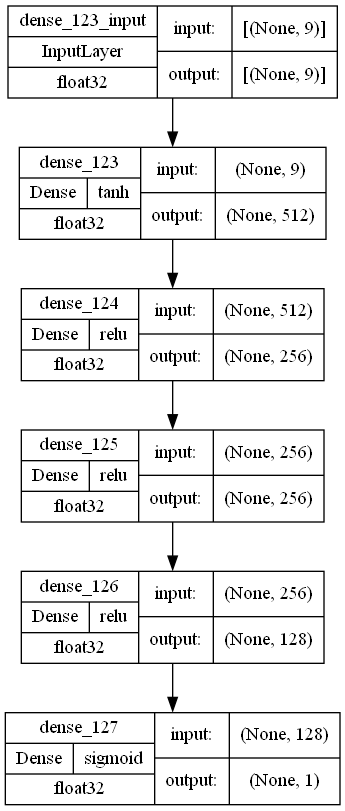

In [276]:
keras.utils.plot_model(nn,
                       show_shapes=True,
                       show_dtype=True,
                       show_layer_names=True,
                       show_layer_activations=True)

In [277]:
class SaveWeightsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 5 == 0:
            self.model.save_weights('model_weights.h5')
            print(f'  Saved model weights at epoch {epoch}.')

In [278]:
# Compile the model
nn.compile(
    optimizer='adam',
    metrics=['accuracy'],
    loss='binary_crossentropy'
)

In [279]:
# Train the model
history = nn.fit(X_train_scaled,Y_train,epochs=100,validation_data=(X_test_scaled, Y_test),batch_size=128, callbacks=[SaveWeightsCallback()])

Epoch 1/100
215/215 [==============================] - 5s 14ms/step - loss: 0.5863 - accuracy: 0.7146 - val_loss: 0.5743 - val_accuracy: 0.7204
Epoch 2/100
215/215 [==============================] - 2s 11ms/step - loss: 0.5718 - accuracy: 0.7238 - val_loss: 0.5803 - val_accuracy: 0.7217
Epoch 3/100
215/215 [==============================] - 2s 10ms/step - loss: 0.5685 - accuracy: 0.7220 - val_loss: 0.5746 - val_accuracy: 0.7200
Epoch 4/100
215/215 [==============================] - 2s 9ms/step - loss: 0.5672 - accuracy: 0.7235 - val_loss: 0.5750 - val_accuracy: 0.7197
Epoch 5/100
215/215 [==============================] - 2s 9ms/step - loss: 0.5657 - accuracy: 0.7254 - val_loss: 0.5734 - val_accuracy: 0.7157
Epoch 6/100
215/215 [==============================] - 2s 9ms/step - loss: 0.5642 - accuracy: 0.7260 - val_loss: 0.5756 - val_accuracy: 0.7171
Epoch 7/100
215/215 [==============================] - 2s 10ms/step - loss: 0.5641 - accuracy: 0.7258 - val_loss: 0.5739 - val_accuracy: 0.

In [281]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 1s - loss: 0.5668 - accuracy: 0.7255 - 1s/epoch - 6ms/step
Loss: 0.566843569278717, Accuracy: 0.7255101799964905
